# **Import the Dataset**

In [3]:
import csv
import numpy as np

labels_x = []
labels_y = []

with open('labels.csv', mode='r') as file:
    csv_reader = csv.reader(file)

    header = next(csv_reader)

    for row in csv_reader:
        row_elements = []
        for i in range(1, len(row) - 1):
          row_elements.append(float(row[i]))
        labels_x.append(row_elements)
        labels_y.append(int(row[-1]))

print(f"Total Data Points: {len(labels_x)}")
print("Feature Names: Calories, Total Fat DV%, Saturated Fat DV%, Trans Fat (g), Cholesterol DV%, Sodium DV%, Total Carbs DV%, Total Sugars (g), Added Sugars DV%, Protein (g), Vitamin D DV%, Calcium DV%, Iron DV%, Potassium DV%")

Total Data Points: 221
Feature Names: Calories, Total Fat DV%, Saturated Fat DV%, Trans Fat (g), Cholesterol DV%, Sodium DV%, Total Carbs DV%, Total Sugars (g), Added Sugars DV%, Protein (g), Vitamin D DV%, Calcium DV%, Iron DV%, Potassium DV%


### Apply Z-score Scaling




In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

labels_x_scaled = scaler.fit_transform(labels_x)

# **Train the K-Nearest Neighbors Classifier**

### Apply Principal Component Analysis

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
labels_x_scaled_down = pca.fit_transform(labels_x_scaled)

### Apply SMOTE oversampling

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)

labels_x_oversampled, labels_y_oversampled = smote.fit_resample(labels_x_scaled_down, labels_y)

### Split into training and test sets

In [6]:
from sklearn.model_selection import train_test_split

labels_x_train, labels_x_test, labels_y_train, labels_y_test = train_test_split(labels_x_oversampled, labels_y_oversampled, test_size=0.2, random_state=42)

### Train the Classifier

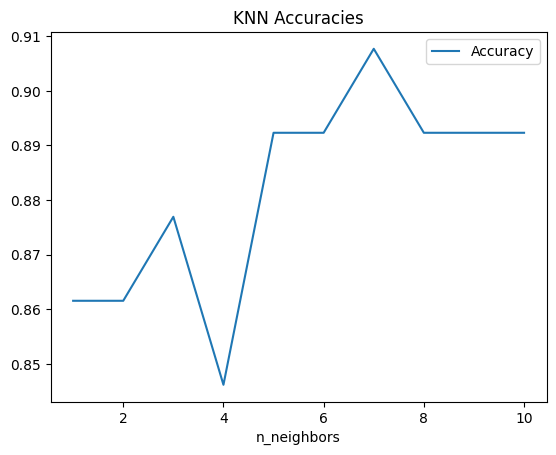

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

test_accuracies = []

for i in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
  knn.fit(labels_x_train, labels_y_train)
  knn_predictions = knn.predict(labels_x_test)
  test_accuracies.append(accuracy_score(labels_y_test, knn_predictions))

n_neighbors_lists = {
    'Accuracy': test_accuracies,
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

test_accuracies_df = pd.DataFrame(n_neighbors_lists)

test_accuracies_df.plot(title='KNN Accuracies', kind='line', x='n_neighbors', y='Accuracy')

plt.show()

best_n = test_accuracies.index(max(test_accuracies)) + 1

knn = KNeighborsClassifier(n_neighbors=best_n, weights='distance')
knn.fit(labels_x_train, labels_y_train)
knn_predictions = knn.predict(labels_x_test)

# **Train the Decision Tree Classifier**

### Apply SMOTE Oversampling

In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)

labels_x_oversampled, labels_y_oversampled = smote.fit_resample(labels_x_scaled, labels_y)

### Split into Train and Test sets

In [9]:
from sklearn.model_selection import train_test_split

labels_x_train_dt, labels_x_test_dt, labels_y_train_dt, labels_y_test_dt = train_test_split(labels_x_oversampled, labels_y_oversampled, test_size=0.2, random_state=42)

### Train the Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(labels_x_train_dt, labels_y_train_dt)

dt_predictions = decision_tree.predict(labels_x_test_dt)

# Train SVM Model

### Apply SMOTE Oversampling

In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

labels_x_oversampled, labels_y_oversampled = smote.fit_resample(labels_x_scaled, labels_y)

### Split Into Train and Testing Sets

In [12]:
from sklearn.model_selection import train_test_split

labels_x_train_svm, labels_x_test_svm, labels_y_train_svm, labels_y_test_svm = train_test_split(labels_x_oversampled, labels_y_oversampled, test_size=0.2, random_state=42)

### Train Classifier

In [13]:
# Initialize and train the Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(labels_x_train_svm, labels_y_train_svm)

# Predict on the test set
svm_predictions = svm_classifier.predict(labels_x_test_svm)

# Train Gaussian Naive Bayes Model

Apply SMOTE Oversampling

In [14]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

labels_x_oversampled, labels_y_oversampled = smote.fit_resample(labels_x_scaled, labels_y)

### Split Dataset Into Training and Testing Sets

In [15]:
from sklearn.model_selection import train_test_split

labels_x_train_nb, labels_x_test_nb, labels_y_train_nb, labels_y_test_nb = train_test_split(labels_x_oversampled, labels_y_oversampled, test_size=0.2, random_state=42)

### Train Classifier

In [16]:
# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(labels_x_train_nb, labels_y_train_nb)

# Predict on the test set
nb_predictions = nb_classifier.predict(labels_x_test_nb)

# **Metrics Visualization**

### Confusion Matrices - Decision Tree and KNN

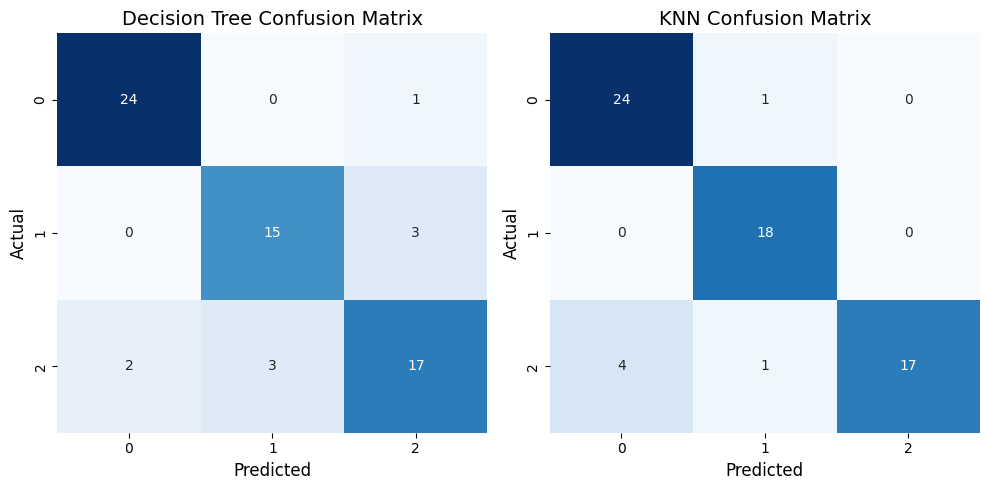

In [17]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix_dt = confusion_matrix(labels_y_test_dt, dt_predictions)
confusion_matrix_knn = confusion_matrix(labels_y_test, knn_predictions)

# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Plotting the confusion matrix for KNN
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()

### Confusion Matrices - SVM and Naive Bayes

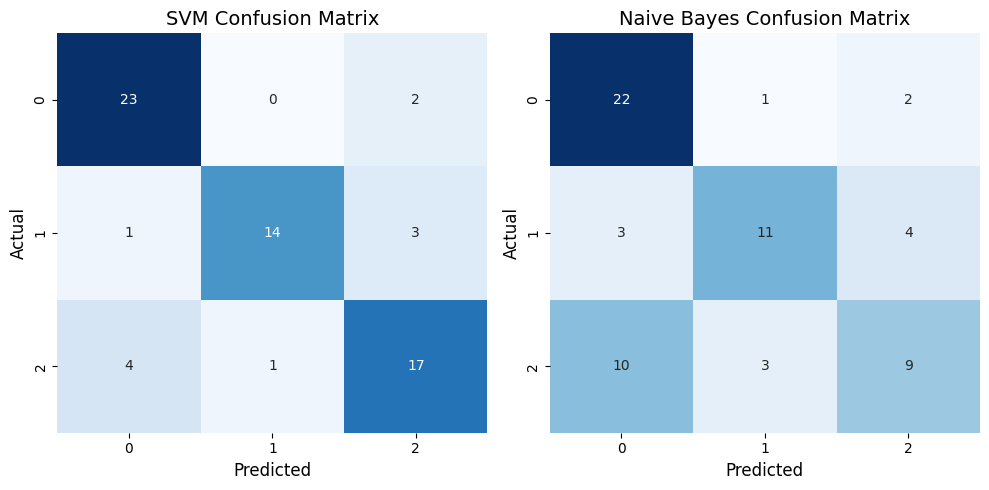

In [18]:
confusion_matrix_svm = confusion_matrix(labels_y_test_svm, svm_predictions)
confusion_matrix_nb = confusion_matrix(labels_y_test_nb, nb_predictions)

# Plotting the confusion matrix for SVM
plt.figure(figsize=(10, 5))

# SVM confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Gaussian Naive Bayes confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()

### Accuracy Plot

Decision Tree Accuracy: 0.8615384615384616
KNN Accuracy: 0.9076923076923077
SVM Accuracy: 0.8307692307692308
Naive Bayes Accuracy: 0.6461538461538462


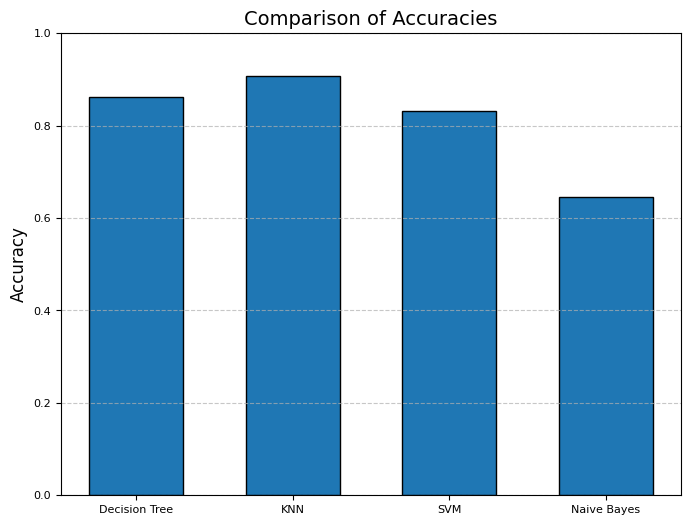

In [21]:
from sklearn.metrics import accuracy_score

decision_tree_accuracy = accuracy_score(labels_y_test_dt, dt_predictions)
knn_accuracy = accuracy_score(labels_y_test, knn_predictions)
svm_accuracy = accuracy_score(labels_y_test_svm, svm_predictions)
nb_accuracy = accuracy_score(labels_y_test_nb, nb_predictions)
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")

models = ['Decision Tree', 'KNN', 'SVM', 'Naive Bayes']
accuracies = [decision_tree_accuracy, knn_accuracy, svm_accuracy, nb_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, width=0.6, edgecolor='black')

plt.title('Comparison of Accuracies', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### F1-score Plot

Decision Tree F1-score: 0.8603809323371566
KNN F1-score: 0.9057481260368739
SVM F1-score: 0.830320622773453
Naive Bayes F1-score: 0.6313236313236313


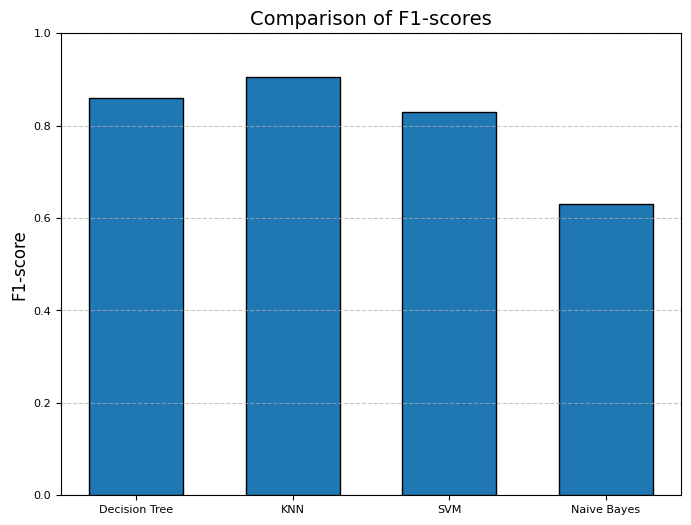

In [22]:
from sklearn.metrics import f1_score

decision_tree_f1 = f1_score(labels_y_test_dt, dt_predictions, average='weighted')
knn_f1 = f1_score(labels_y_test, knn_predictions, average='weighted')
svm_f1 = f1_score(labels_y_test_svm, svm_predictions, average='weighted')
nb_f1 = f1_score(labels_y_test_nb, nb_predictions, average='weighted')
print(f"Decision Tree F1-score: {decision_tree_f1}")
print(f"KNN F1-score: {knn_f1}")
print(f"SVM F1-score: {svm_f1}")
print(f"Naive Bayes F1-score: {nb_f1}")

models = ['Decision Tree', 'KNN', 'SVM', 'Naive Bayes']
f1_scores = [decision_tree_f1, knn_f1, svm_f1, nb_f1]

plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, width=0.6, edgecolor='black')

plt.title('Comparison of F1-scores', fontsize=14)
plt.ylabel('F1-score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()